In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os 
sb.set()

#**Mounting G Drive** 


In [ ]:
from google.colab import drive 
drive.mount ('/content/drive')

#**Load Dataset**

In [5]:
Data = pd.read_csv('/content/drive/MyDrive/Machine Learning/House Price Prediction/Bengaluru_House_Dat.csv')

In [6]:
Data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
Data.shape

(13320, 9)

In [8]:
Data.info

<bound method DataFrame.info of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.

In [9]:
Data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

#**Checking a Unique Value**

In [10]:
for columns in Data.columns:
  print(columns)
  print("_"*50)
  print(Data[columns].value_counts())
  print("_"*50)

area_type
__________________________________________________
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
__________________________________________________
availability
__________________________________________________
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
__________________________________________________
location
__________________________________________________
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st

In [11]:
Data.drop(columns=['society'],inplace=True)

In [12]:
Data = Data.dropna(how='any',axis=0)

In [13]:
Data.shape

(12710, 8)

In [14]:
Data.describe()

,bath,balcony,price
count,12710.000000,12710.000000,12710.000000
mean,2.617309,1.584343,106.060778
std,1.226000,0.817287,131.766089
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,49.030000
50%,2.000000,2.000000,70.000000
75%,3.000000,2.000000,115.000000
max,40.000000,3.000000,2912.000000


In [15]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   availability  12710 non-null  object 
 2   location      12710 non-null  object 
 3   size          12710 non-null  object 
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(3), object(5)
memory usage: 893.7+ KB


#**Splitting size Column for Integer Values due to Inconsistent Suffixes**

In [16]:
Data['bhk'] = Data['size'].str.split().str.get(0).astype(int)

<ipython-input-16-2857748652bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['bhk'] = Data['size'].str.split().str.get(0).astype(int)


#**Chechikng for Outliers**

In [17]:
Data[Data.bhk > 20]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


#**Checking for Range for this Column**

In [18]:
Data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#**Creating a Funtion to deal with the Ranges given in some cells in "total_sqrt" Column**

In [19]:
def Covt_Range(x):
  temp = x.split('_')
  if len(temp) == 2:
    return (float(temp[0]) + float(temp[1]))/2
  try:
    return float(x)
  except:
    return None

#**Applying "Covt_Range" to "total_sqft" Column**

In [20]:
Data['total_sqft'] = Data['total_sqft'].apply(Covt_Range)

<ipython-input-20-66865245f100>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['total_sqft'] = Data['total_sqft'].apply(Covt_Range)


In [21]:
Data['total_sqft'].unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

In [22]:
Data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [23]:
Data.drop(columns = ['area_type', 'availability'], inplace = True)

<ipython-input-23-bce3dc209096>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.drop(columns = ['area_type', 'availability'], inplace = True)


In [24]:
Data.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


<ipython-input-25-18355df31396>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = Data.corr()


<Axes: >

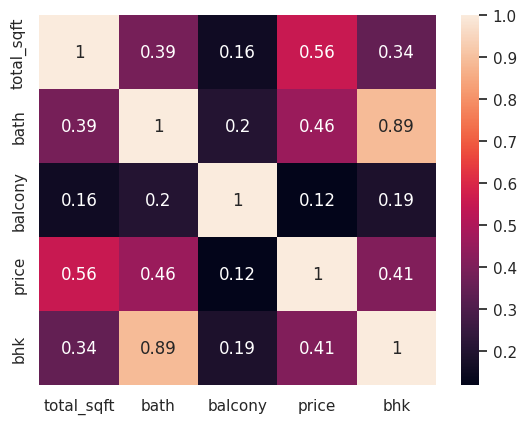

In [25]:
correlation = Data.corr()
sb.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True)

In [26]:
Data['bath'].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [27]:
Data['balcony'].unique()

array([1., 3., 2., 0.])

In [28]:
Data['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

#**"bath" and "bhk" columns are highly correlated, we need to drop one of them**

In [29]:
Data.drop(columns = ['bath'], inplace = True)

<ipython-input-29-20b088150f8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.drop(columns = ['bath'], inplace = True)


In [30]:
Data.head()

,location,size,total_sqft,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,1.0,51.00,2


#**Finding price per sq.ft**

In [31]:
Data['price_per_sqft'] = Data['price']*100000 / Data['total_sqft']

<ipython-input-31-b9a4c4af673c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['price_per_sqft'] = Data['price']*100000 / Data['total_sqft']


In [32]:
Data['price_per_sqft'] = Data['price_per_sqft'].round(2)
Data['price_per_sqft']

<ipython-input-32-1f55a6d89806>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['price_per_sqft'] = Data['price_per_sqft'].round(2)


0         3699.81
1         4615.38
2         4305.56
3         6245.89
4         4250.00
           ...   
13314     6530.61
13315     6689.83
13317     5258.55
13318    10407.34
13319     3090.91
Name: price_per_sqft, Length: 12710, dtype: float64

In [33]:
Data.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,12524.000000,12710.000000,12710.000000,12710.000000,1.252400e+04
mean,1510.454911,1.584343,106.060778,2.737136,6.897454e+03
std,1162.445581,0.817287,131.766089,1.205097,2.276190e+04
min,5.000000,0.000000,8.000000,1.000000,2.678300e+02
25%,1100.000000,1.000000,49.030000,2.000000,4.240118e+03
50%,1260.000000,2.000000,70.000000,3.000000,5.392160e+03
75%,1640.000000,2.000000,115.000000,3.000000,7.171310e+03
max,52272.000000,3.000000,2912.000000,43.000000,2.300000e+06


In [34]:
Data['location'] = Data['location'].apply(lambda x: x.strip())
location_count = Data['location'].value_counts()
location_count

<ipython-input-34-7a5da26fc671>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['location'] = Data['location'].apply(lambda x: x.strip())


Whitefield          515
Sarjapur  Road      372
Electronic City     302
Kanakpura Road      261
Thanisandra         234
                   ... 
Shirdi Sai Nagar      1
S R Layout            1
Meenakshi Layout      1
Vidyapeeta            1
Abshot Layout         1
Name: location, Length: 1254, dtype: int64

In [35]:
location_cnt_less_10 = location_count[location_count <= 10]
location_cnt_less_10

Kalkere                  10
Kodigehalli              10
Ganga Nagar              10
1st Block Koramangala    10
Gunjur Palya             10
                         ..
Shirdi Sai Nagar          1
S R Layout                1
Meenakshi Layout          1
Vidyapeeta                1
Abshot Layout             1
Name: location, Length: 1017, dtype: int64

In [36]:
Data['location'] = Data['location'].apply(lambda x: 'other' if x in location_cnt_less_10 else x)

<ipython-input-36-b37dcf2fd318>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['location'] = Data['location'].apply(lambda x: 'other' if x in location_cnt_less_10 else x)


In [37]:
Data['location'].value_counts()

other                        2739
Whitefield                    515
Sarjapur  Road                372
Electronic City               302
Kanakpura Road                261
                             ... 
Marsur                         11
LB Shastri Nagar               11
2nd Phase Judicial Layout      11
ISRO Layout                    11
Vishveshwarya Layout           11
Name: location, Length: 238, dtype: int64

#**Removing Outliers**

In [38]:
Data.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,12524.000000,12710.000000,12710.000000,12710.000000,1.252400e+04
mean,1510.454911,1.584343,106.060778,2.737136,6.897454e+03
std,1162.445581,0.817287,131.766089,1.205097,2.276190e+04
min,5.000000,0.000000,8.000000,1.000000,2.678300e+02
25%,1100.000000,1.000000,49.030000,2.000000,4.240118e+03
50%,1260.000000,2.000000,70.000000,3.000000,5.392160e+03
75%,1640.000000,2.000000,115.000000,3.000000,7.171310e+03
max,52272.000000,3.000000,2912.000000,43.000000,2.300000e+06


#**Removing outliers from "total_sqft" column**

In [39]:
(Data['total_sqft']/Data['bhk']).describe()

count    12524.000000
mean       569.033597
std        381.881959
min          0.714286
25%        472.916667
50%        550.000000
75%        621.270833
max      26136.000000
dtype: float64

In [40]:
Data = Data[((Data['total_sqft']/Data['bhk']) >= 300)]
Data.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,11869.000000,11869.000000,11869.000000,11869.000000,11869.000000
mean,1541.229363,1.606875,105.170490,2.609824,6220.296594
std,1181.717548,0.794513,134.650984,0.919589,4004.343253
min,300.000000,0.000000,9.000000,1.000000,267.830000
25%,1109.000000,1.000000,48.700000,2.000000,4198.470000
50%,1285.000000,2.000000,68.270000,2.000000,5263.160000
75%,1656.000000,2.000000,110.000000,3.000000,6844.740000
max,52272.000000,3.000000,2912.000000,13.000000,176470.590000


In [41]:
Data.shape

(11869, 7)

In [42]:
Data.price_per_sqft.describe()

count     11869.000000
mean       6220.296594
std        4004.343253
min         267.830000
25%        4198.470000
50%        5263.160000
75%        6844.740000
max      176470.590000
Name: price_per_sqft, dtype: float64

#**Removing the outliers from "price_per_sqft" Column**

In [43]:
q = Data['price_per_sqft'].quantile(0.99)
data_1 = Data[Data['price_per_sqft'] < q ]
data_1.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,11749.000000,11749.000000,11749.000000,11749.000000,11749.000000
mean,1527.941078,1.606349,98.363056,2.595966,5989.980988
std,1162.632575,0.793249,102.483076,0.903830,2882.911306
min,300.000000,0.000000,9.000000,1.000000,267.830000
25%,1107.000000,1.000000,48.330000,2.000000,4186.950000
50%,1280.000000,2.000000,68.000000,2.000000,5240.170000
75%,1650.000000,2.000000,110.000000,3.000000,6770.830000
max,52272.000000,3.000000,2200.000000,13.000000,20740.740000


In [89]:
def bhk_outliers(Data):
  exclude_indices=np.array([]) # creating an empty array which will carry all the values we need
  for location, location_Data in Data.groupby('location'):
    bhk_stats={}
    for bhk, bhk_Data in location_Data.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean':np.mean(bhk_Data.price_per_sqft),
          'std':np.std(bhk_Data.price_per_sqft),
          'count':bhk_Data.shape[0]
      }
    for bhk, bhk_Data in location_Data.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5: #checking for threshold no.of data points to get accurate mean
          exclude_indices = np.append(exclude_indices, bhk_Data[bhk_Data.price_per_sqft<(stats['mean'])].index)
    return Data.drop(exclude_indices, axis='index')

    

In [90]:
Data=bhk_outliers(Data)
Data.shape


(11869, 7)

In [91]:
Data.head()

,location,size,total_sqft,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,1.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,3.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,3.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,1.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,1.0,51.00,2,4250.00


# Removing columns which are not necessary for the model


In [102]:
Data.drop(columns=['size','price_per_sqft'], inplace=True)

In [103]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11869 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    11869 non-null  object 
 1   total_sqft  11869 non-null  float64
 2   balcony     11869 non-null  float64
 3   price       11869 non-null  float64
 4   bhk         11869 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 556.4+ KB


In [104]:
#clean data set
Data.to_csv("Cleaned_data.csv")

In [105]:
x = Data.drop(columns=['price']) #independant Features
y = Data['price']  # feature which we are predicting through the model

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state =0)

In [122]:
print(x_train.shape)
print(x_test.shape)

(9495, 4)
(2374, 4)


# Model 1 : Linear Regression

In [129]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False), ['location']), remainder = 'passthrough')

In [130]:
scaler = StandardScaler()


In [131]:
lr=LinearRegression()

In [133]:
pipe= make_pipeline(column_trans, scaler, lr)

In [134]:
pipe.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [135]:
y_pred_lr=pipe.predict(x_test)

In [136]:
r2_score(y_test, y_pred_lr)

0.43867834219697033

# Model 2 : Lasso

In [138]:
lasso =Lasso()

In [139]:
pipe= make_pipeline(column_trans,scaler, lasso)

In [140]:
pipe.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [141]:
y_pred_lasso=pipe.predict(x_test)
r2_score(y_test, y_pred_lasso)

0.4358231310467522

# Model 3: Ridge

In [142]:
ridge=Ridge()

In [143]:
pipe=make_pipeline(column_trans,scaler,ridge)

In [144]:
pipe.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [145]:
y_pred_ridge=pipe.predict(x_test)
r2_score(y_test, y_pred_ridge)

0.4381364422063859